In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")

# Drop Id columns
df_train = df_train.drop(['Id'],axis=1)
df_test = df_test.drop(['Id'],axis=1)

print("Training Dataframe shape:\t ",df_train.shape,"\nTesting Dataframe shape:\t",df_test.shape)

Training Dataframe shape:	  (1460, 80) 
Testing Dataframe shape:	 (1459, 79)


## Let's know the Data (or EDA: Exploratory Data Analysis)

## Continuous Data

### List of continuos Columns

In [5]:
continuous_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF",
                   "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF",
                   "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","LowQualFinSF"]

## Scatter Plots

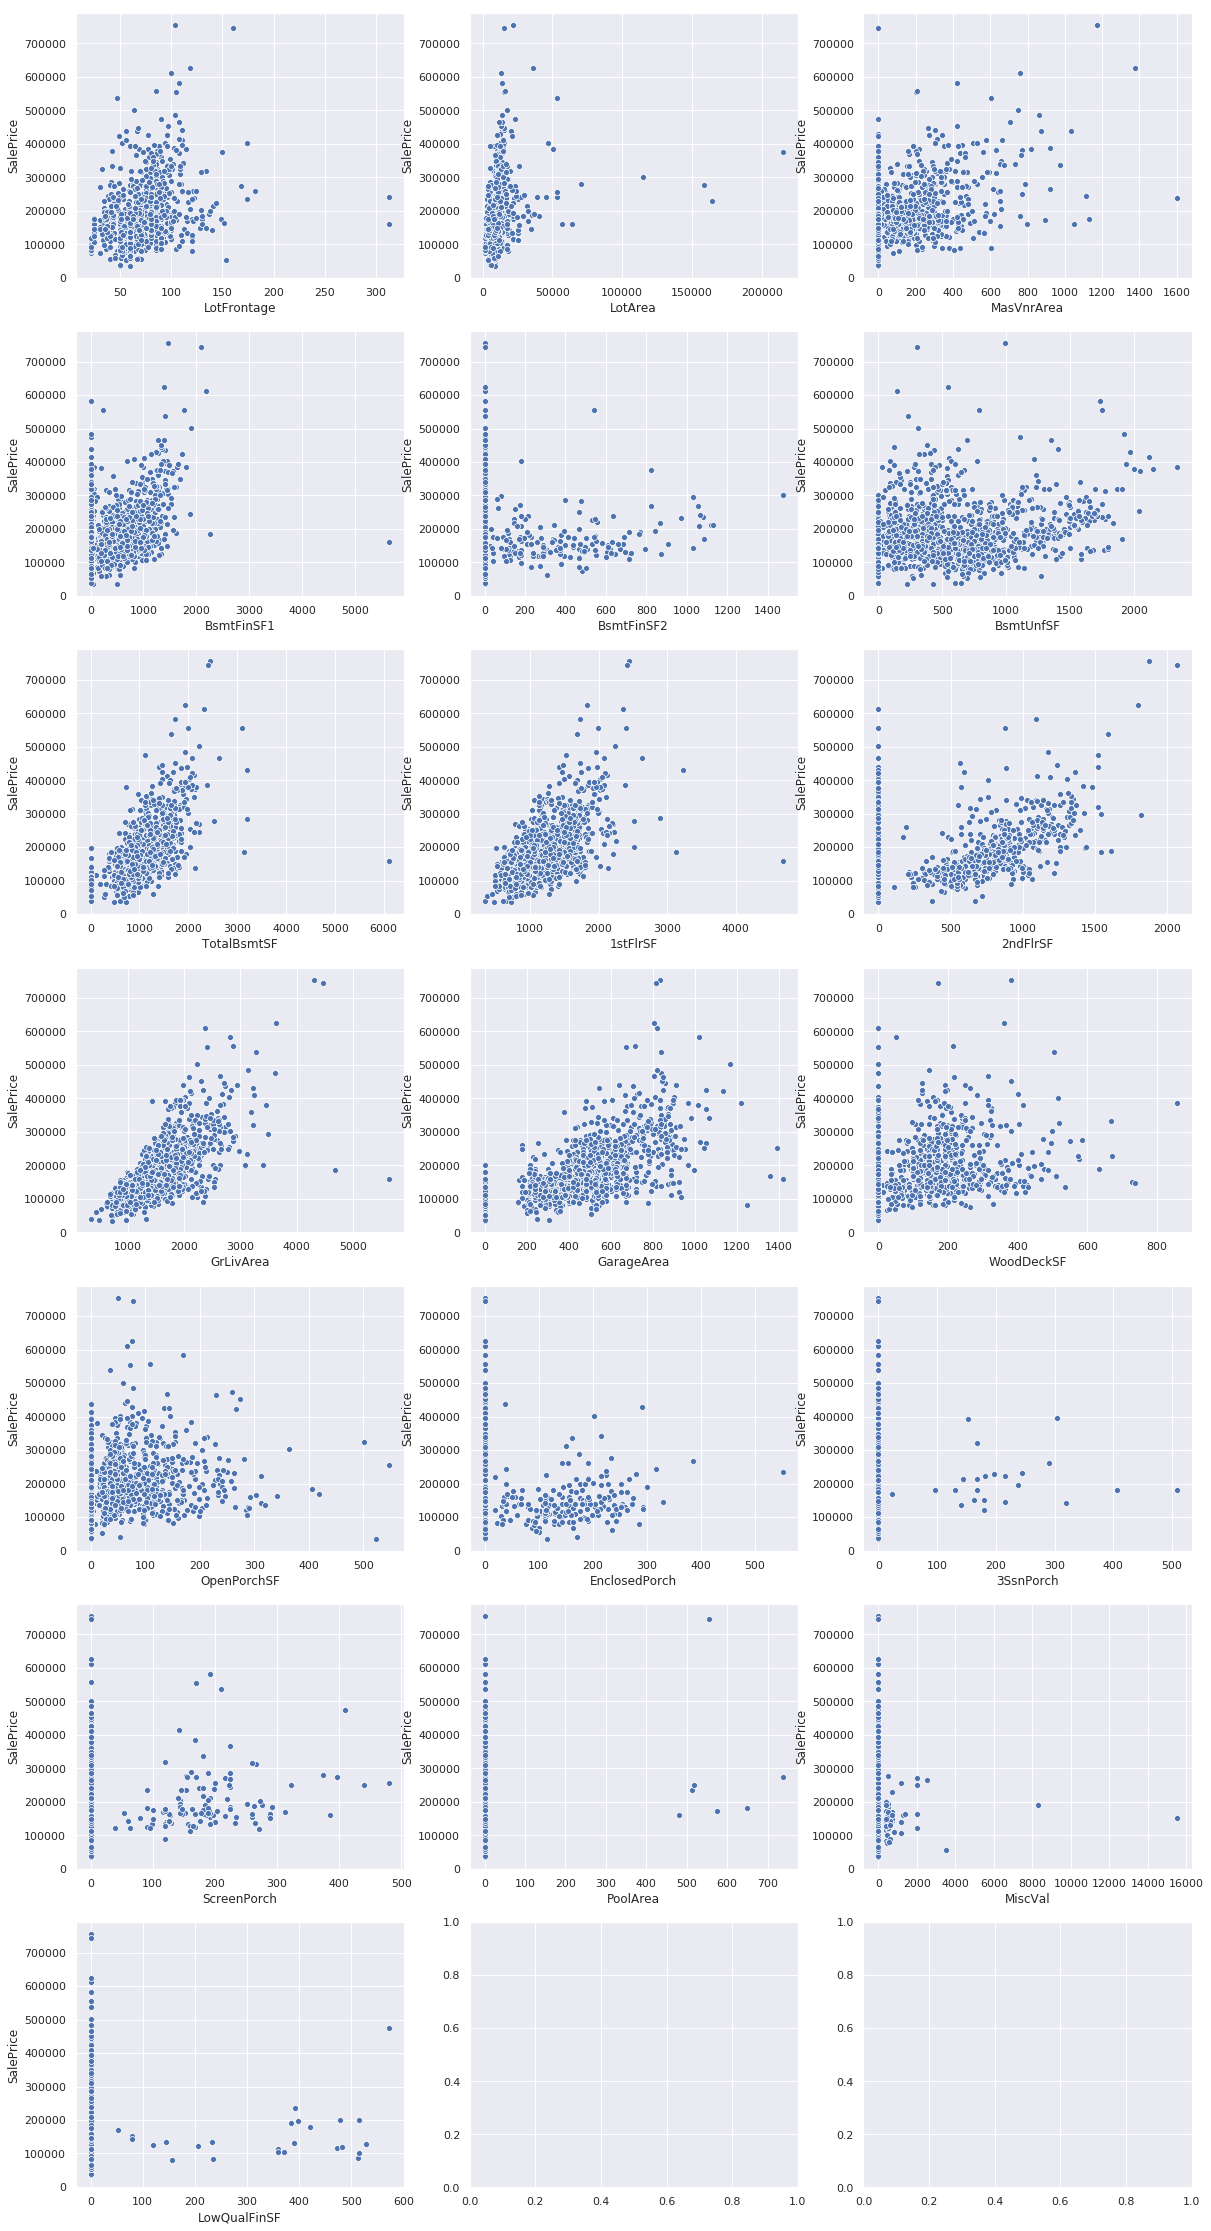

In [6]:
#set theme for seaborn plot
sns.set()
fig, axes =plt.subplots(7,3,figsize=(20, 40))
for cols in range(19):
    column = continuous_cols[cols]
    sns.scatterplot(x=column, y='SalePrice', data=df_train,ax=axes[int(cols/3)][cols%3])
# last 2 plots are empty

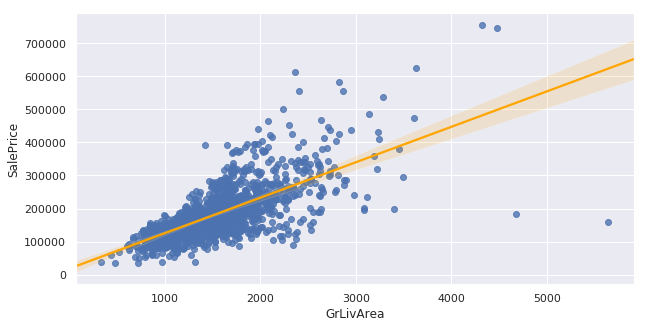

In [7]:
plt.figure(figsize=(10,5))
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train,line_kws={"color": "orange"});

## Get Correlation Matrix

/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


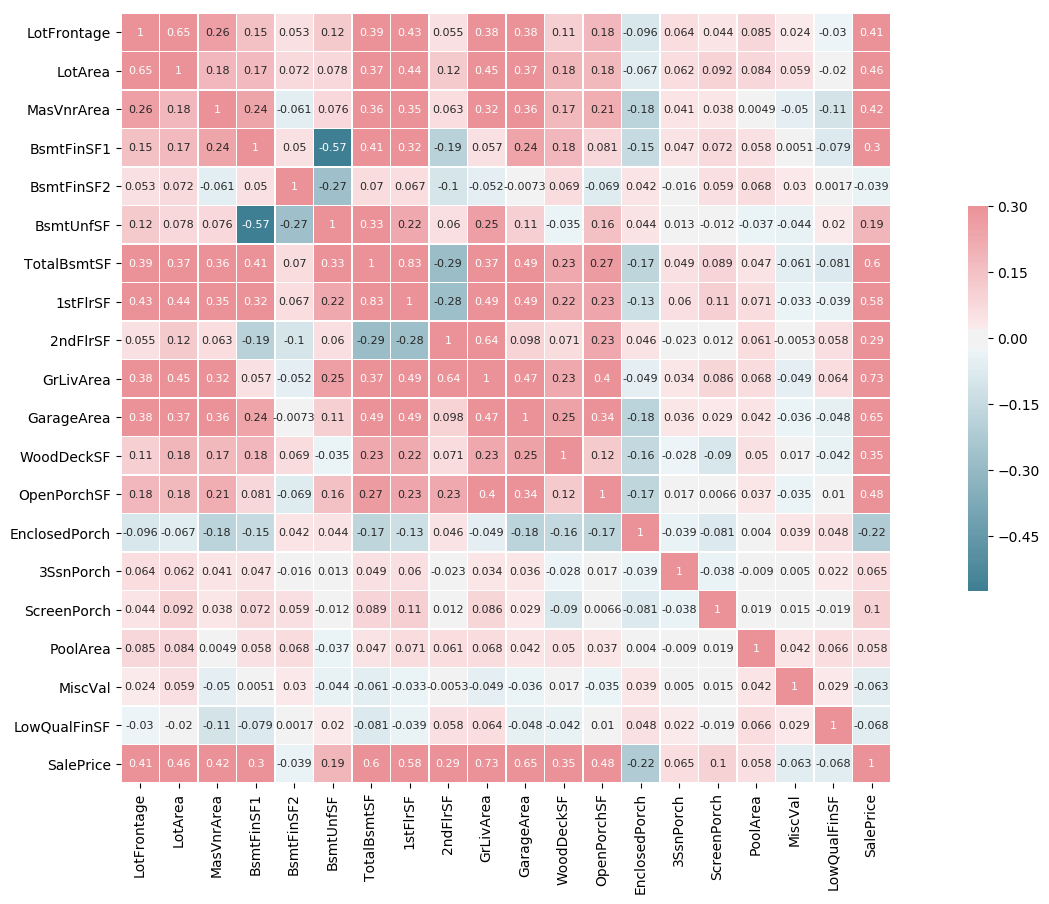

In [8]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(continuous_cols+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

## Categorical Data

### List of Categorical Columns

In [9]:
# Use a function
# Iterate over columns of df (except last column SalePrice)
# Exclude those which are in Continuous Columns
categorical_cols = [x for x in list(df_train.iloc[:,:-1].columns) if x not in continuous_cols]

In [10]:
len(categorical_cols)

60

## Get Boxplots

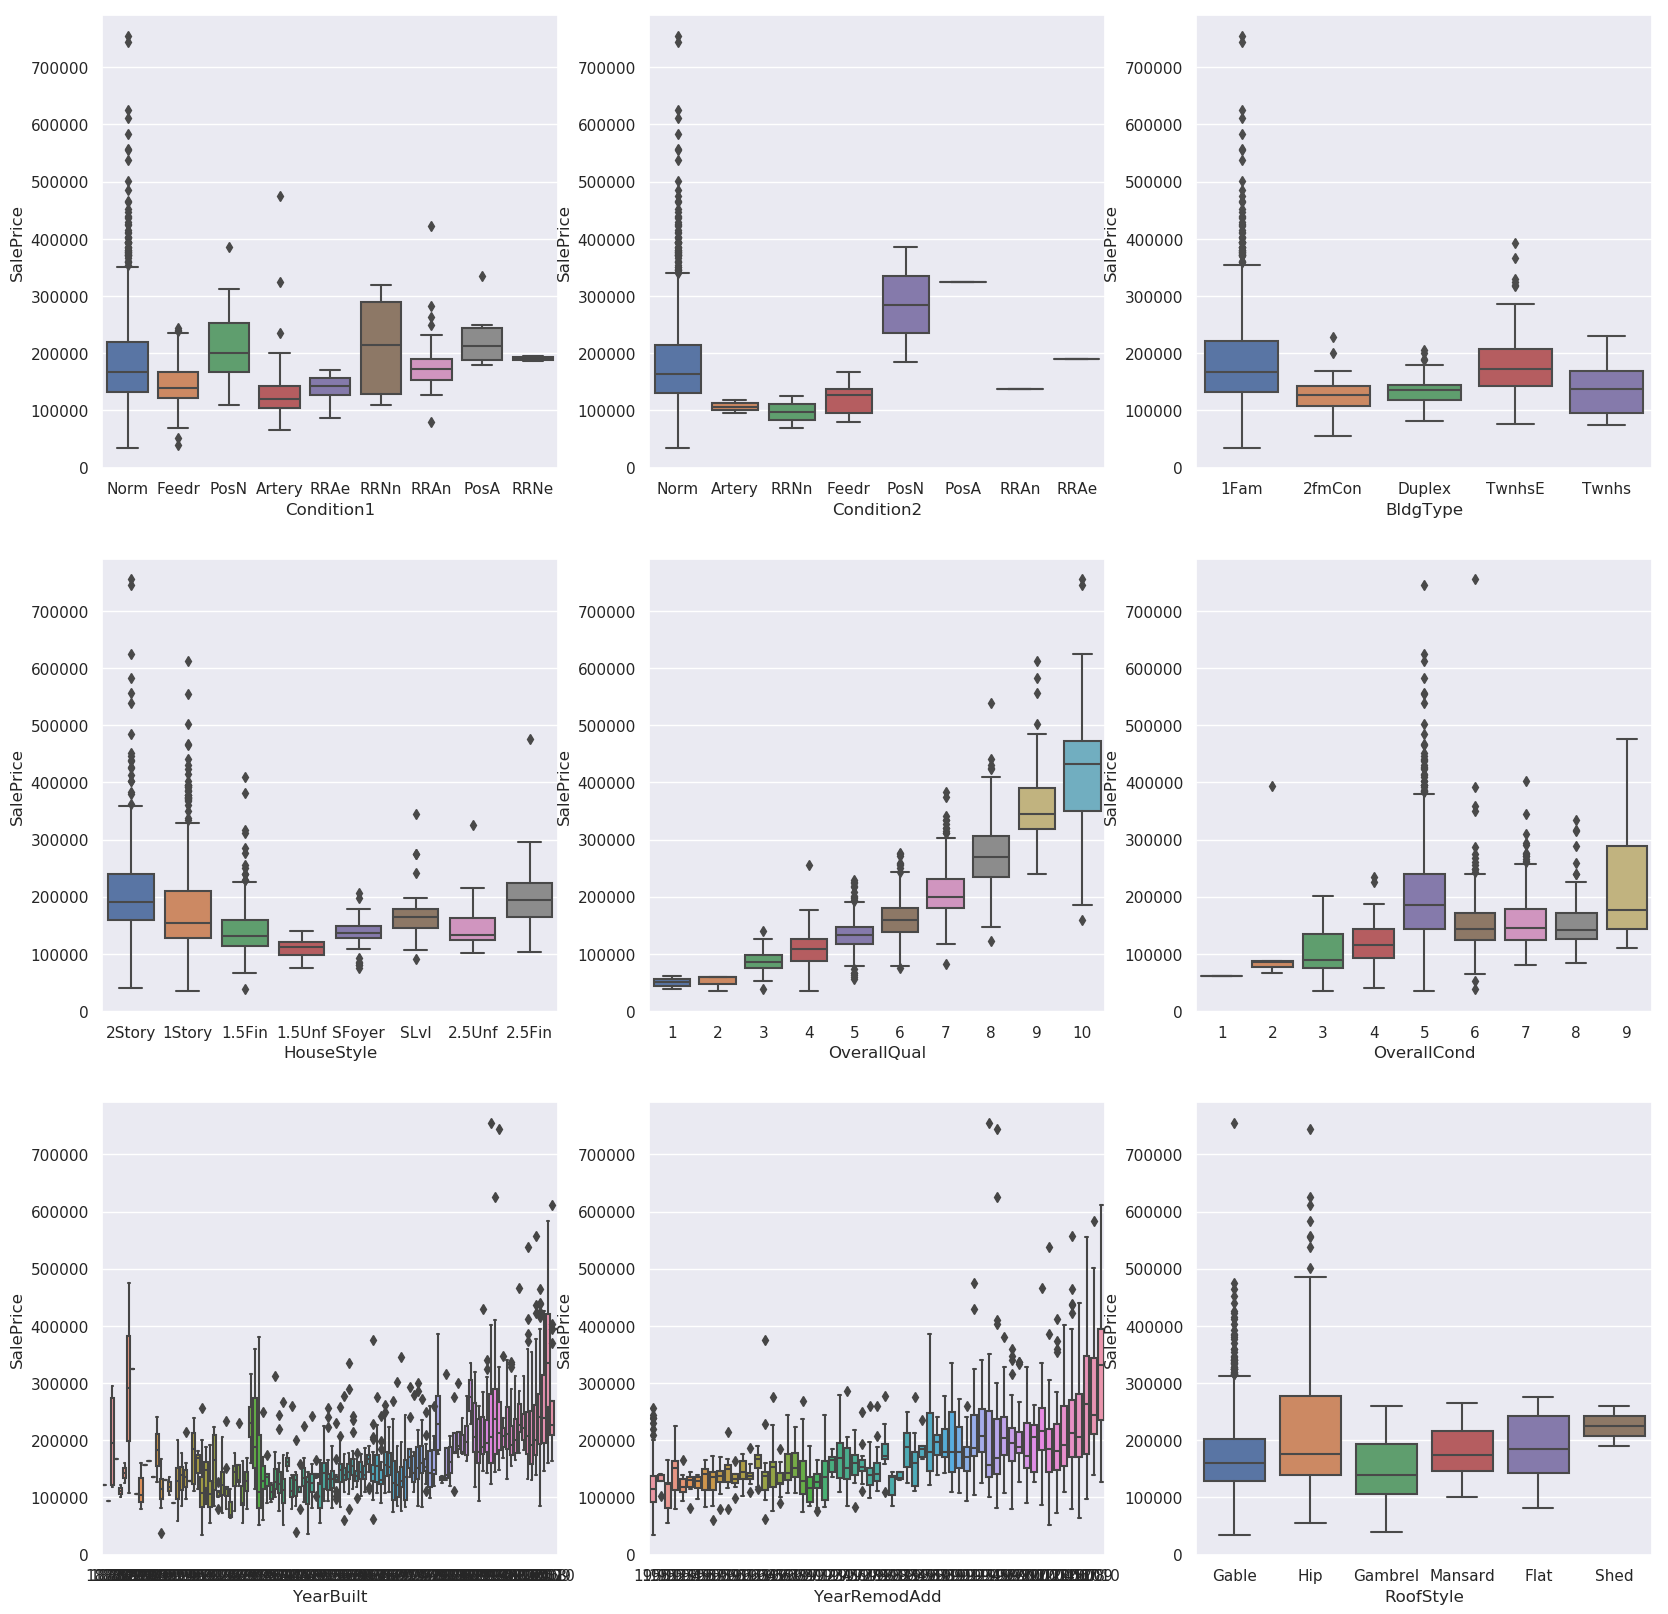

In [11]:
#set theme for seaborn plot
sns.set()
# I have only plotted 16 of the 60 categorical variables here
# Do fig, axes =plt.subplots(15,4,figsize=(60,60)) for all but then you can't see anything
# Better to see all of them one at a time
fig, axes =plt.subplots(3,3,figsize=(20,20))
for cols in range(9):
    column = categorical_cols[cols+10]
    sns.boxplot(x=column, y="SalePrice",data=df_train,ax=axes[int(cols/3)][cols%3])
    

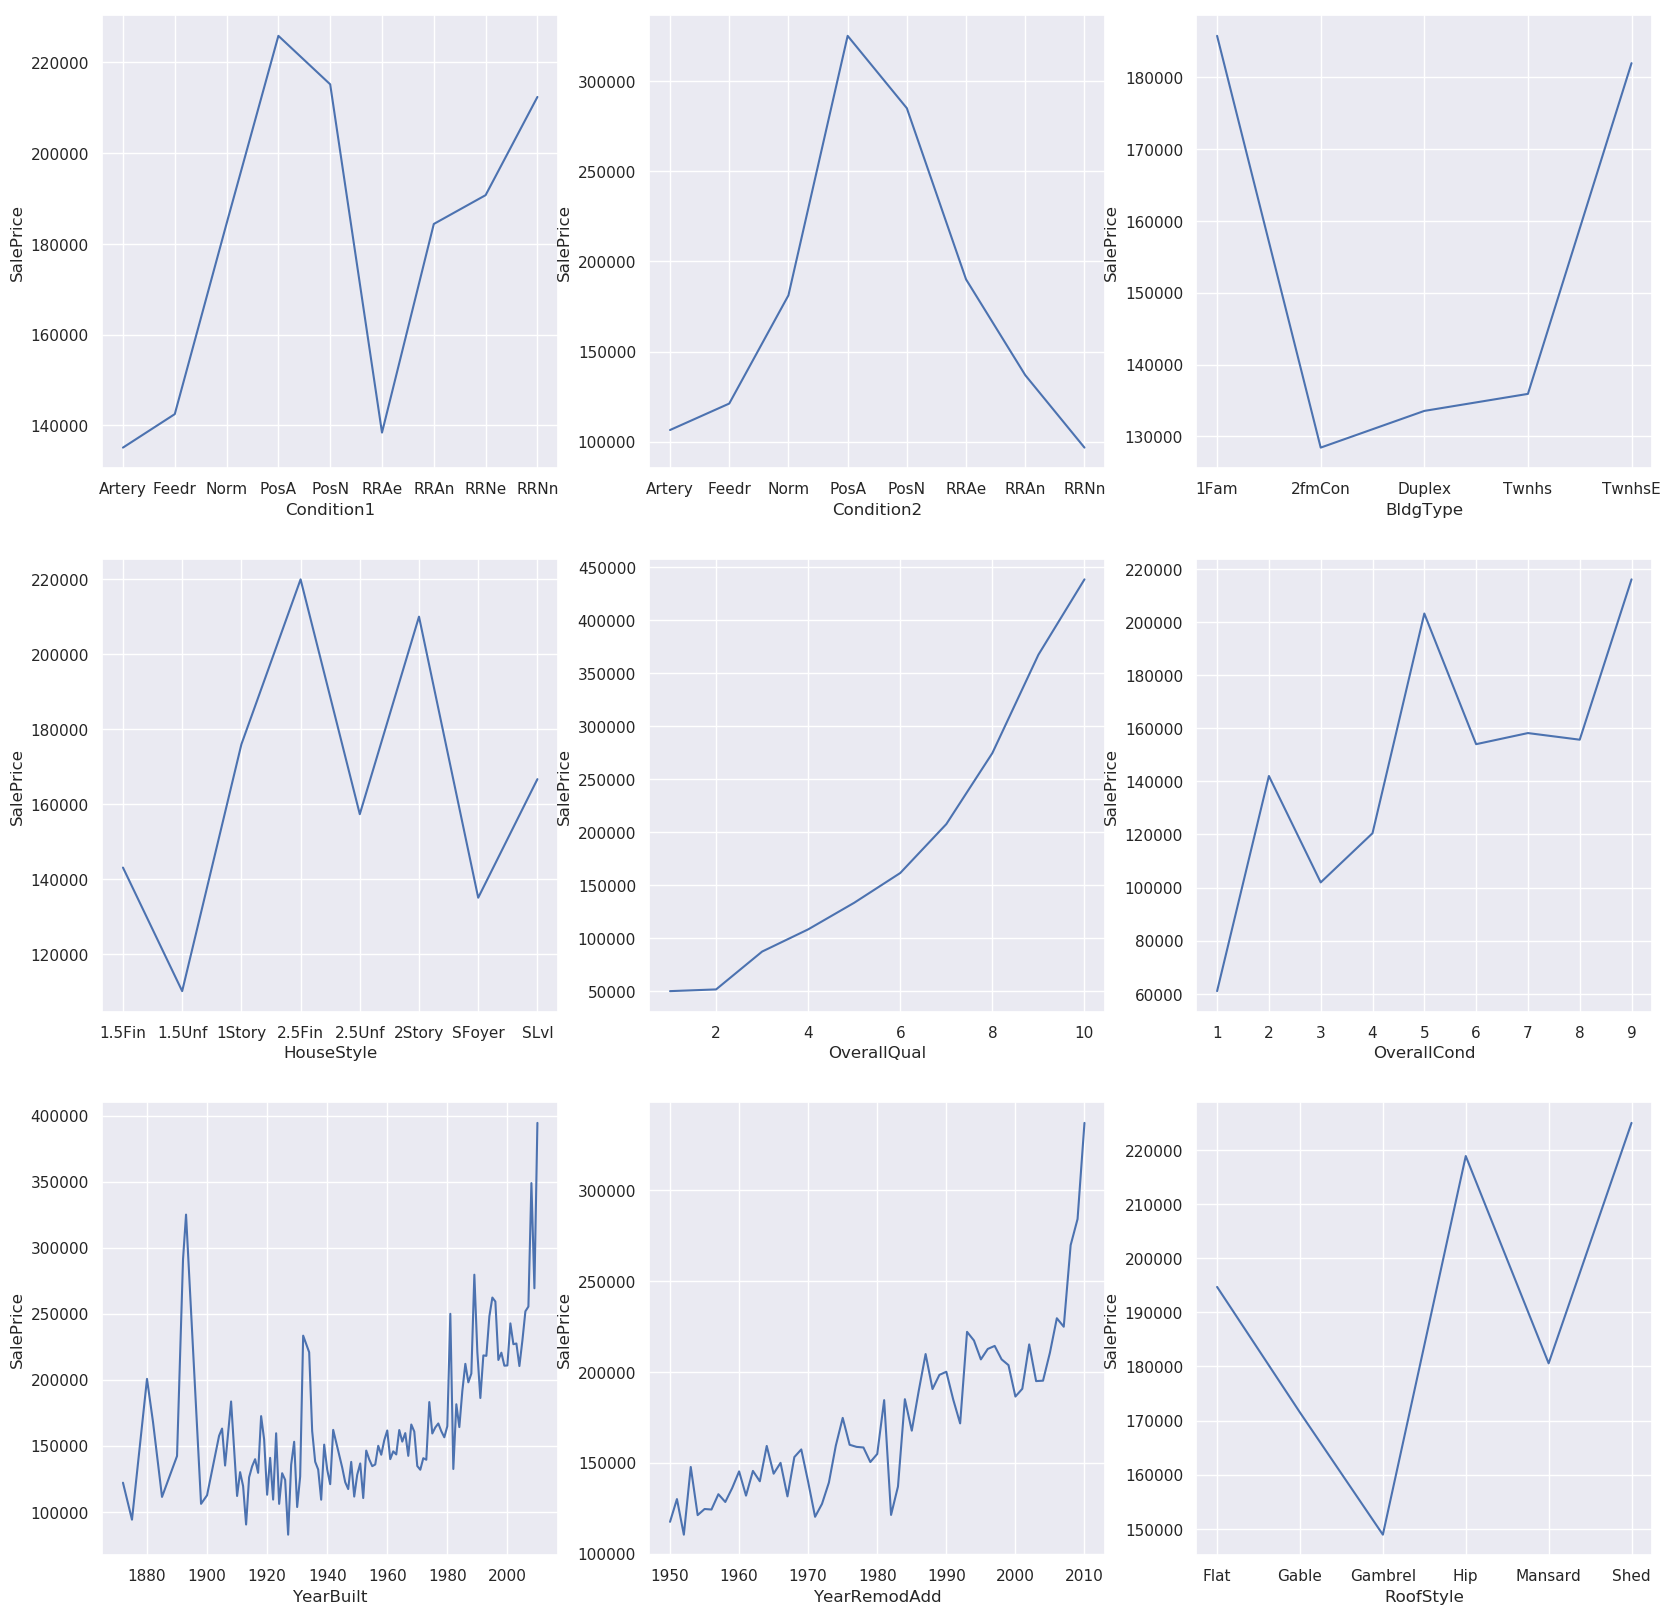

In [12]:
#set theme for seaborn plot
sns.set()
# I have only plotted 16 of the 60 categorical variables here
# Do fig, axes =plt.subplots(15,4,figsize=(60,60)) for all but then you can't see anything
# Better to see all of them one at a time
fig, axes =plt.subplots(3,3,figsize=(20,20))
for cols in range(9):
    column = categorical_cols[cols+10]
    temp_Df = df_train[[column,'SalePrice']].groupby(column).mean().reset_index()
#     print(temp_Df.head())
    sns.lineplot(x=temp_Df[column], y=temp_Df["SalePrice"],ax=axes[int(cols/3)][cols%3])

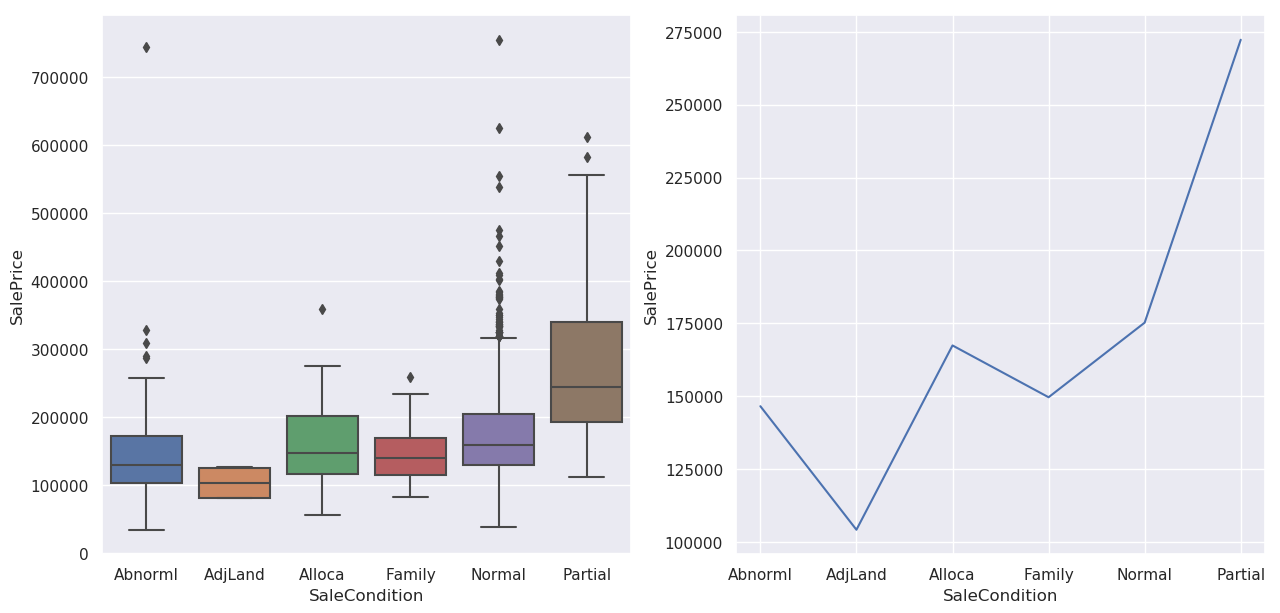

In [15]:
sns.set()
fig, axes =plt.subplots(1,2,figsize=(15,7))
sns.set_style("whitegrid")
sns.boxplot(x=df_train['SaleCondition'], y=df_train["SalePrice"],data=df_train,ax=axes[0],
            order = ['Abnorml','AdjLand','Alloca','Family','Normal','Partial'])
temp_Df =df_train[['SaleCondition','SalePrice']].groupby('SaleCondition').mean().reset_index()
sns.lineplot(x=temp_Df['SaleCondition'], y=temp_Df["SalePrice"],ax=axes[1])

## Ordinal Variables

### I have to convert ordinal variable values to numbers

In [16]:
def util(val):
    if(val in ('Ex','GLQ','SBrkr')):
        return 5
    elif(val in ('Gd','ALQ','Rec','FuseA')):
        return 4
    elif(val in ('Ta','Av','BLQ','FuseF','Fin')):
        return 3
    elif(val in ('Fa','Mn','LwQ','FuseP','RFn')):
        return 2
    elif(val in ('Po','No','Unf','Mix','Unf')):
        return 1
    else:
        return 0

def string_to_numbers(df):
    df['ExterQual_num'] = df.apply(lambda x:util(x['ExterQual']),axis=1).astype(int)
    df = df.drop(['ExterQual'],axis=1)
    
    df['ExterCond_num'] = df.apply(lambda x:util(x['ExterCond']),axis=1).astype(int)
    df = df.drop(['ExterCond'],axis=1)
    
    df['BsmtQual_num'] = df.apply(lambda x:util(x['BsmtQual']),axis=1).astype(int)
    df = df.drop(['BsmtQual'],axis=1)
    
    df['BsmtCond_num'] = df.apply(lambda x:util(x['BsmtCond']),axis=1).astype(int)
    df = df.drop(['BsmtCond'],axis=1)
    
    df['HeatingQC_num'] = df.apply(lambda x:util(x['HeatingQC']),axis=1).astype(int)
    df = df.drop(['HeatingQC'],axis=1)
    
    df['Electrical_num'] = df.apply(lambda x:util(x['Electrical']),axis=1).astype(int)
    df = df.drop(['Electrical'],axis=1)
    
    df['KitchenQual_num'] = df.apply(lambda x:util(x['KitchenQual']),axis=1).astype(int)
    df = df.drop(['KitchenQual'],axis=1)
    
    df['FireplaceQu_num'] = df.apply(lambda x:util(x['FireplaceQu']),axis=1).astype(int)
    df = df.drop(['FireplaceQu'],axis=1)
    
    df['GarageFinish_num'] = df.apply(lambda x:util(x['GarageFinish']),axis=1).astype(int)
    df = df.drop(['GarageFinish'],axis=1)
    
    df['GarageQual_num'] = df.apply(lambda x:util(x['GarageQual']),axis=1).astype(int)
    df = df.drop(['GarageQual'],axis=1)
    
    df['GarageCond_num'] = df.apply(lambda x:util(x['GarageCond']),axis=1).astype(int)
    df = df.drop(['GarageCond'],axis=1)
    
    df['PoolQC_num'] = df.apply(lambda x:util(x['PoolQC']),axis=1).astype(int)
    df = df.drop(['PoolQC'],axis=1)
    return df

In [17]:
df_train = string_to_numbers(df_train)

In [18]:
ordinal_variable = ['ExterQual_num','ExterCond_num','BsmtQual_num','BsmtCond_num','HeatingQC_num',
                    'Electrical_num','KitchenQual_num','FireplaceQu_num','GarageFinish_num','GarageQual_num',
                    'GarageCond_num','OverallQual','OverallCond','PoolQC_num'
                   ]

/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


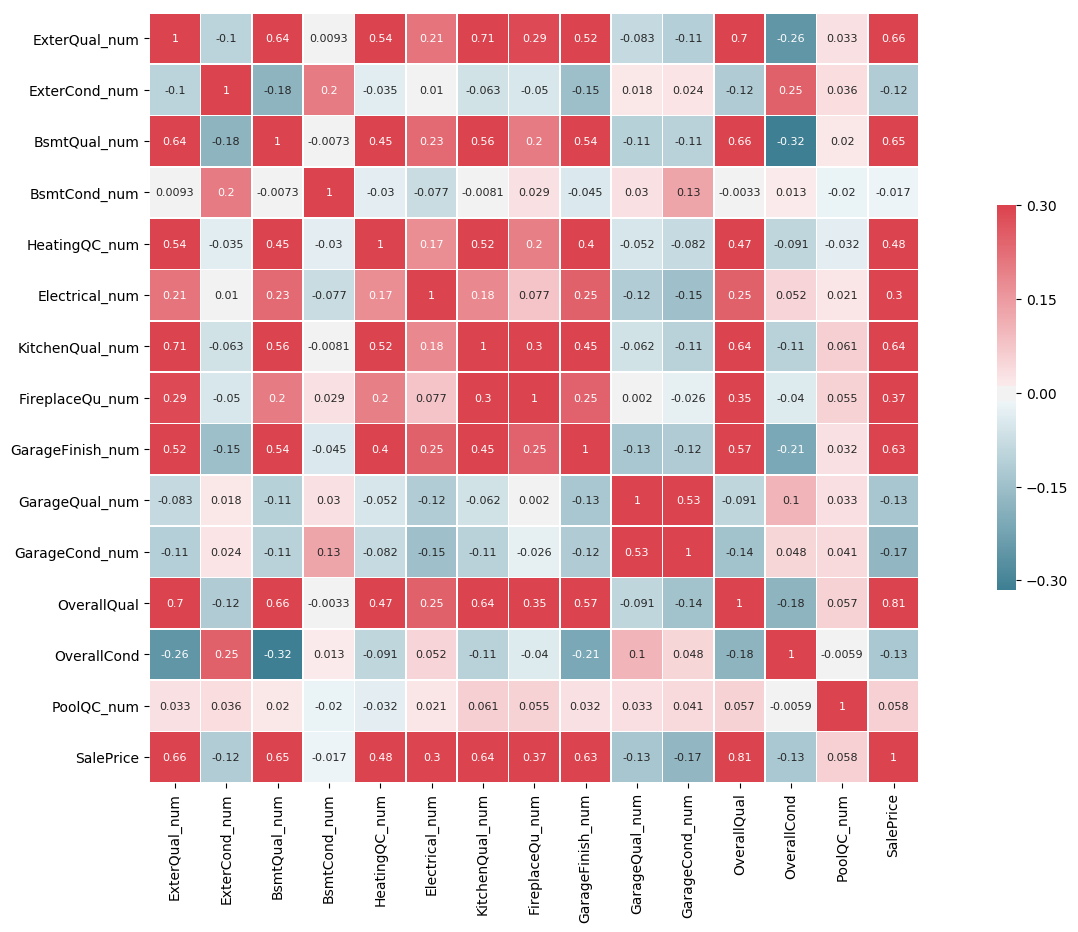

In [19]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(ordinal_variable+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


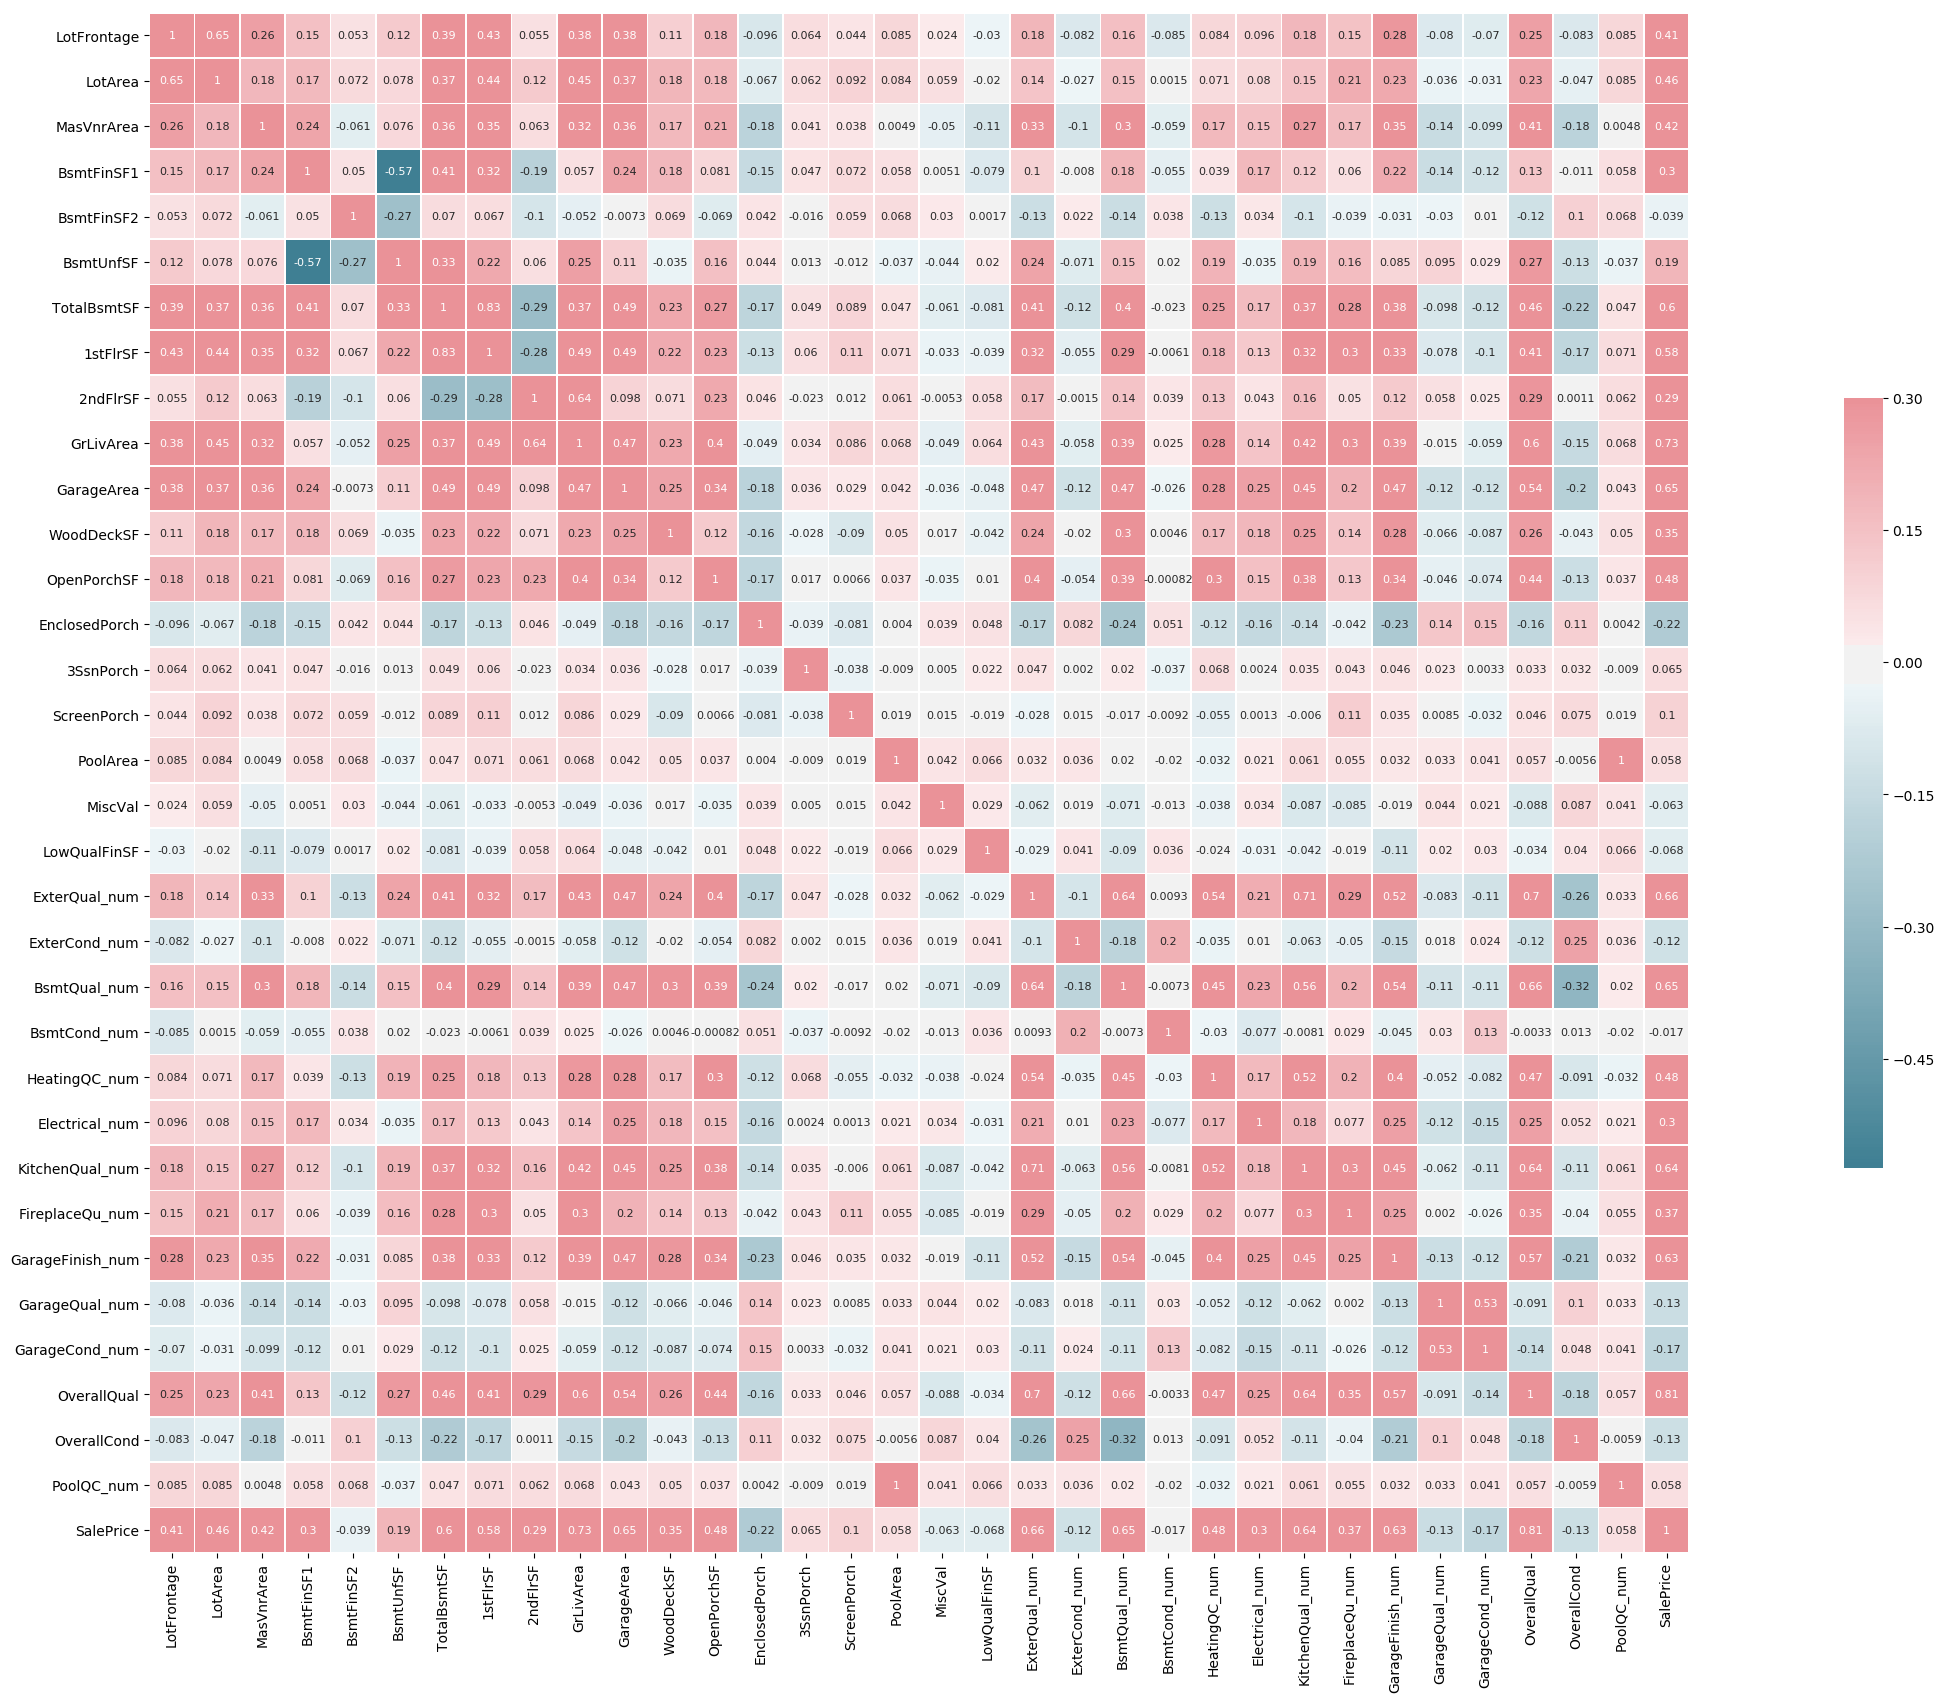

In [20]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(continuous_cols+ordinal_variable+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})